In [1]:
from google.colab import files
files.upload()  # Upload the kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"parvgaur","key":"5155f1e388d7e85974f488b0c7e9be4a"}'}

In [8]:
# Set up kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [9]:
!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [15]:
#generators-divide dataset into batches
train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [16]:
# Normailze
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)


In [18]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

model = Sequential([
    Input(shape=(256, 256, 3)), # <--- Yahan input shape define kiya
    Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu"), # Ab yahan input_shape nahi dena
    MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"),
    Conv2D(64, kernel_size=(3,3), padding="valid", activation="relu"),
    MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.1),
    Dense(64, activation="relu"),
    Dropout(0.1),
    Dense(1, activation="sigmoid")
])

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    31,490,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,517,889 (120.23 MB)

 Trainable params: 31,517,889 (120.23 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [23]:
history=model.fit(train_ds,epochs=3,validation_data=validation_ds)

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 2615s 4s/step - accuracy: 0.6137 - loss: 0.6641 - val_accuracy: 0.7034 - val_loss: 0.5929
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 2641s 4s/step - accuracy: 0.7325 - loss: 0.5343 - val_accuracy: 0.7400 - val_loss: 0.5638
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 2611s 4s/step - accuracy: 0.8323 - loss: 0.3676 - val_accuracy: 0.7218 - val_loss: 0.8225


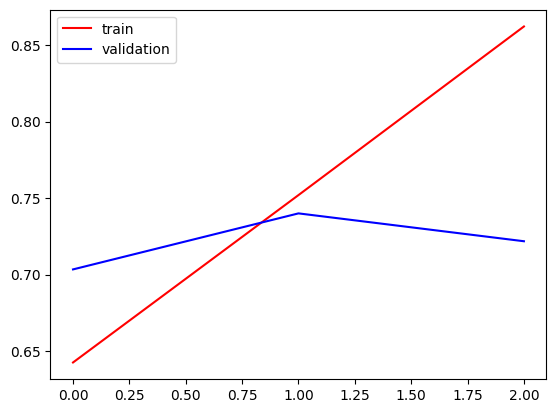

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [25]:
import cv2

Predicting Wether it's a cat or dog

In [26]:
test_img=cv2.imread("/content/dog.png")
test_img.shape

(259, 420, 3)

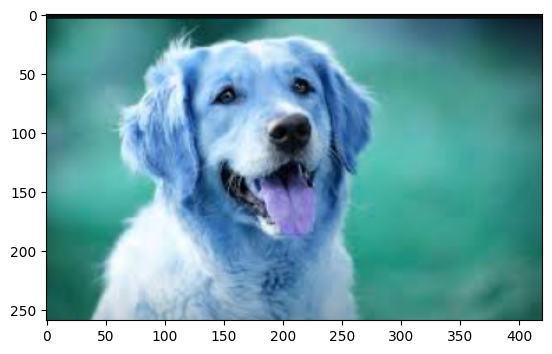

In [28]:
plt.imshow(test_img)

In [29]:
test_img.shape

(259, 420, 3)

In [31]:
test_img=cv2.resize(test_img,(256,256))

In [32]:
test_input=test_img.reshape((1,256,256,3))

In [33]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


array([[1.]], dtype=float32)

Cat

In [34]:
img=cv2.imread("/content/cat.png")

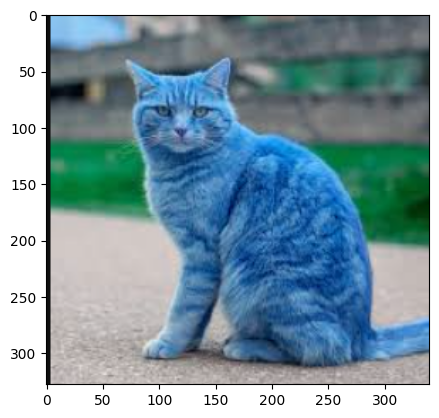

In [37]:
plt.imshow(img)

In [39]:
img.shape

(328, 340, 3)

In [41]:
img=cv2.resize(img,(256,256))
img.shape

(256, 256, 3)

In [44]:
test_input = test_img.reshape(((1, 256, 256, 3)))

In [45]:
model.predict(test_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


array([[1.]], dtype=float32)

In [48]:
import cv2
import numpy as np
# Assuming 'model' is already loaded and defined

# 1. Load the dog image
dog_img = cv2.imread("/content/dog.png") # Make sure the path to dog.png is correct

if dog_img is None:
    print("Error: Could not load the image. Please check the path to 'dog.png'.")
else:
    print(f"Original dog image shape: {dog_img.shape}")

    # 2. Resize the dog image to 256x256
    dog_img_resized = cv2.resize(dog_img, (256, 256))
    print(f"Resized dog image shape: {dog_img_resized.shape}")

    # 3. Reshape the image for model input (add batch dimension)
    dog_input = dog_img_resized.reshape(((1, 256, 256, 3)))
    print(f"Dog input shape for model: {dog_input.shape}")

    # 4. Make a prediction using your model
    prediction = model.predict(dog_input)

    print(f"Model prediction: {prediction}")

    # 5. Interpret the prediction
    # You'll need to know what your model outputs for a dog.
    # If it's a binary classifier (0 for cat, 1 for dog, or vice versa)
    # or if it's a multi-class classifier.

    # Example: If 0 is Cat and 1 is Dog based on your model's output
    if prediction[0][0] > 0.5: # Assuming your model outputs a probability for one class
        print("Dog")
    else:
        print("Cat")

    # If your model outputs probabilities for multiple classes (e.g., [prob_cat, prob_dog]):
    # class_labels = ["Cat", "Dog"] # Define your class labels
    # predicted_class_index = np.argmax(prediction[0])
    # print(f"Predicted class: {class_labels[predicted_class_index]}")

Original dog image shape: (259, 420, 3)
Resized dog image shape: (256, 256, 3)
Dog input shape for model: (1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Model prediction: [[1.]]
Dog
